In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def rgb2gray(_img):
    img = _img.copy().astype(np.float)
    r = img[..., 2].copy()
    g = img[..., 1].copy()
    b = img[..., 0].copy()
    img = 0.2126 * r + 0.7152 * g + 0.0722 * b
    img = img.astype(np.uint8)
    return img

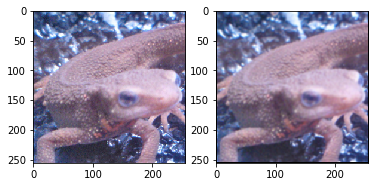

In [2]:
#11
def smoothing(_img, size=3):
    img = _img.copy().astype(np.float)
    out = np.zeros_like(img)
    pad = size // 2
    
    h, w, c = img.shape
    for i in range(pad, h-pad):
        for j in range(pad, w-pad):
            for k in range(c):
                out[i, j, k] = np.mean(img[i-pad:i+pad+1, j-pad:j+pad+1, k])
    out = out.astype(np.uint8)
    return out


img = cv2.imread('imori.png')
img = img[..., ::-1]

plt.subplot(1, 2, 1)
plt.imshow(img)

result = smoothing(img)

plt.subplot(1, 2, 2)
plt.imshow(result)

plt.show()

[[0.33333333 0.         0.        ]
 [0.         0.33333333 0.        ]
 [0.         0.         0.33333333]]


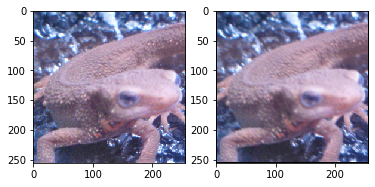

In [46]:
#12
def motion(_img, size=3):
    img = _img.copy().astype(np.float)
    out = np.zeros_like(img)
    pad = size // 2
    
    ker = np.zeros((size, size))
    for i in range(size):
        ker[i, i] = 1 / 3
    print(ker)
    
    h, w, c = img.shape
    for i in range(pad, h-pad):
        for j in range(pad, w-pad):
            for k in range(c):
                out[i, j, k] = np.sum(img[i-pad:i+pad+1, j-pad:j+pad+1, k] * ker)

    out = out.astype(np.uint8)
    return out


img = cv2.imread('imori.png')
img = img[..., ::-1]

result = motion(img)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

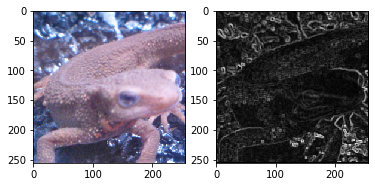

In [71]:
#13
def max_min(_img, size=3):
    img = rgb2gray(_img)
    out = np.zeros_like(img)
    pad = size // 2
    
    w, h = img.shape
    for i in range(pad, h-pad):
        for j in range(pad, w-pad):
            out[i, j] = np.max(img[i-pad:i+pad+1, j-pad:j+pad+1]) - np.min(img[i-pad:i+pad+1, j-pad:j+pad+1])
            
    return out
    
img = cv2.imread('imori.png')
img = img[..., ::-1]

result = max_min(img)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.show()

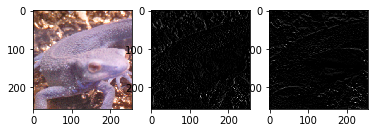

In [7]:
#14
def differencial_x(_img):
    img = rgb2gray(_img).astype(np.float)
    out = np.zeros_like(img)
    
    w, h = img.shape
    for i in range(1, h):
        for j in range(1, w):
            out[i, j] = img[i, j] - img[i, j-1]
            
    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)
    return out

def differencial_y(_img):
    img = rgb2gray(_img).astype(np.float)
    out = np.zeros_like(img)
    
    w, h = img.shape
    for i in range(1, h):
        for j in range(1, w):
            out[i, j] = img[i, j] - img[i-1, j]
            
    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)
    return out



img = cv2.imread('imori.png')

result_x = differencial_x(img.copy())
result_y = differencial_y(img.copy())

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(result_x, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(result_y, cmap='gray')
plt.show()

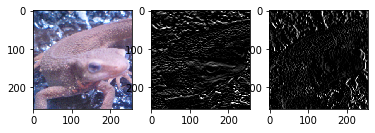

In [9]:
#15
def prewitt(_img, size=3):
    img = rgb2gray(_img).astype(np.float)
    out_x = np.zeros_like(img.copy())
    out_y = np.zeros_like(img.copy())
    pad = size // 2
    
    kx = [[1, 1, 1], [0, 0, 0], [-1, -1, -1]]
    ky = [[1, 0, -1], [1, 0, -1], [1, 0, -1]]
    
    h, w = img.shape
    for i in range(pad, h-pad):
        for j in range(pad, w-pad):
            out_x[i, j] = np.sum(img[i-pad:i+pad+1, j-pad:j+pad+1] * kx)
            out_y[i, j] = np.sum(img[i-pad:i+pad+1, j-pad:j+pad+1] * ky)
    
    out_x = np.clip(out_x, 0, 255)
    out_y = np.clip(out_y, 0, 255)
    out_x = out_x.astype(np.uint8)
    out_y = out_y.astype(np.uint8)
    return out_x, out_y


img = cv2.imread('imori.png')
img = img[..., ::-1]

result_x, result_y = prewitt(img)

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(result_x, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(result_y, cmap='gray')
plt.show()

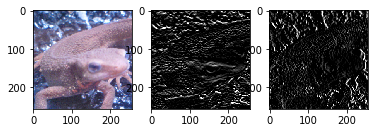

In [3]:
#16
def sobel(_img, size=3):
    img = rgb2gray(_img).astype(np.float)
    out_x = np.zeros_like(img.copy())
    out_y = np.zeros_like(img.copy())
    pad = size // 2
    
    kx = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]
    ky = [[1, 0, -1], [2, 0, -2], [1, 0, -1]]
    
    h, w = img.shape
    for i in range(pad, h-pad):
        for j in range(pad, w-pad):
            out_x[i, j] = np.sum(img[i-pad:i+pad+1, j-pad:j+pad+1] * kx)
            out_y[i, j] = np.sum(img[i-pad:i+pad+1, j-pad:j+pad+1] * ky)
    
    out_x = np.clip(out_x, 0, 255)
    out_y = np.clip(out_y, 0, 255)
    out_x = out_x.astype(np.uint8)
    out_y = out_y.astype(np.uint8)
    return out_x, out_y


img = cv2.imread('imori.png')
img = img[..., ::-1]

result_x, result_y = sobel(img)

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(result_x, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(result_y, cmap='gray')
plt.show()

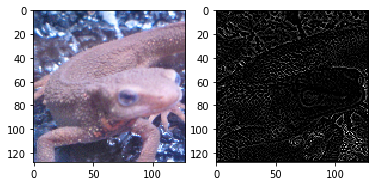

In [5]:
#17
def laplacian(_img):
    img = rgb2gray(_img).astype(np.float)
    out = np.zeros_like(img)
    
    k = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]
    
    w, h = img.shape
    for i in range(1, h-1):
        for j in range(1, w-1):
            out[i, j] = np.sum(img[i-1:i+1+1, j-1:j+1+1] * k)
    
    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)
    return out
    
img = cv2.imread('imori128.png')
img = img[..., ::-1]

result = laplacian(img)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.show()

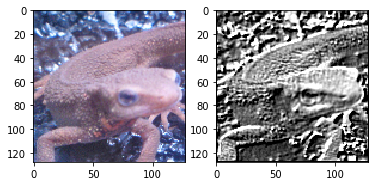

In [6]:
#18
def emboss(_img):
    img = rgb2gray(_img).astype(np.float)
    out = np.zeros_like(img)
    
    k = [[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]
    
    w, h = img.shape
    for i in range(1, h-1):
        for j in range(1, w-1):
            out[i, j] = np.sum(img[i-1:i+1+1, j-1:j+1+1] * k)
    
    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)
    return out
    
img = cv2.imread('imori128.png')
img = img[..., ::-1]

result = emboss(img)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.show()

[[0.02219694 0.03408936 0.03880887 0.03408936 0.02219694]
 [0.03408936 0.04956531 0.05567167 0.04956531 0.03408936]
 [0.03880887 0.05567167 0.06231396 0.05567167 0.03880887]
 [0.03408936 0.04956531 0.05567167 0.04956531 0.03408936]
 [0.02219694 0.03408936 0.03880887 0.03408936 0.02219694]]


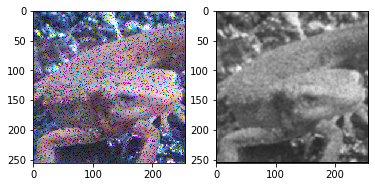

In [13]:
#19
def LoG(_img, size=5, sigma=3):
    img = rgb2gray(_img).astype(np.float)
    out = np.zeros_like(img)
    pad = size // 2
    
    k = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = i - pad
            y = j - pad
            k[i, j] = (x**2 + y**2 - 2 * (sigma**2)) * np.exp(-(x**2 + y**2) / (2 * (sigma**2))) / (2 * np.pi * (sigma**6))
    k /= k.sum()
    print(k)
    
    w, h = img.shape
    for i in range(pad, h-pad):
        for j in range(pad, w-pad):
            out[i, j] = np.sum(img[i-pad:i+pad+1, j-pad:j+pad+1] * k)
    
    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)
    return out
    
img = cv2.imread('imori_noise.png')
img = img[..., ::-1]

result = LoG(img)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.show()

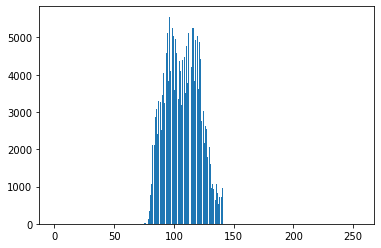

In [24]:
#20
img = cv2.imread('imori_dark.png').ravel()

plt.hist(img, bins= 255, rwidth=0.8, range=(0, 255))
plt.show()